# Import libraries

In [2]:
import imageio
import pandas as pd
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patch
import random

from tqdm.notebook import tqdm
from os import path
from IPython.display import display
from PIL import Image, ImageColor, ImageDraw

from sklearn.cluster import KMeans

random.seed(42)

base_path = "D:\Vezdecode\CV\CV30"

# Determining the dominant color using K-Means

In [3]:
input_dir = path.join(base_path, "resources\merged_data")
files = [path.join(base_path, input_dir, img) for img in os.listdir(input_dir)]

In [4]:
def centroid_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def dominant_colors(perc_colors, centroids):
    max_perc = 0
    max_color = None
    
    for (percent, color) in zip(perc_colors, centroids):
        if percent > max_perc:
            max_perc = percent
            max_color = color
        
    return max_color

def calc_metric(image, x=None, y=None, w=None, h=None):
    print(f"Original image {image.shape}:")
    display(Image.fromarray(image))
    
    if None not in [x, y, w, h]:
        image = image[y:y+h, x:x+w, :]
        print("Crop image:")
        display(Image.fromarray(image)) 
    
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters=3)

    clt.fit(image)
        
    perc_colors = centroid_histogram(clt)
    max_color = dominant_colors(perc_colors, clt.cluster_centers_)
    
    return tuple(np.array(max_color).round().astype("int"))

Original image (299, 299, 3):


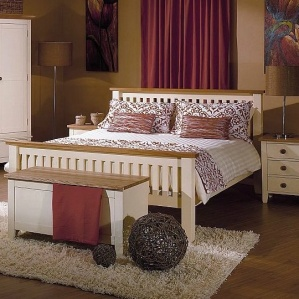

Crop image:


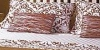

Dominant color: (171, 146, 144)


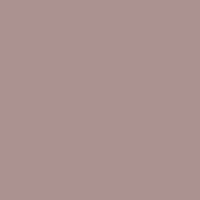

Wall time: 158 ms


In [5]:
%%time
img = cv.imread(files[1])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

color = calc_metric(img, 100, 100, 100, 50)

print(f"Dominant color: {color}")
val_im = Image.new('RGB', (200, 200), color)
draw = ImageDraw.Draw(val_im)
display(val_im)